In [1]:
from utils.viz import plot_time_series, plot_balance, plot_balance_vs_price
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-dark-palette')
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
import pandas as pd
from tqdm import tqdm
from statsmodels.tsa.statespace.varmax import VARMAX

In [4]:
# Step 1: Data Loading
data_df = pd.read_csv('../dataset/insect/ant/location_in_mm.csv')
colony_id = 1
ant_id = 52
data_df = data_df[(data_df['colony_id']==colony_id) & (data_df['ant_id']==ant_id)]
ant_num = colony_id + ant_id
data_df.reset_index(inplace = True)
data = data_df[['location_x', 'location_y']]

In [5]:
# Step 2: Data Preparation
#creating the train and validation set
valid = data[int(0.5*(len(data))):]
train = data[:int(0.5*(len(data)))]
print(train)

      location_x  location_y
0          22.01       13.29
1          22.01       10.27
2          23.07        7.28
3          23.15        6.93
4          22.54        8.28
...          ...         ...
1435       20.19       35.14
1436       20.19       35.14
1437       20.19       35.14
1438       20.19       35.14
1439       20.19       35.14

[1440 rows x 2 columns]


In [ ]:
tmp = []
for p in tqdm(range(5)):
    for q in tqdm(range(5)):
        try:
            tmp.append([VARMAX(train, order = (p,q)).fit().bic, p, q])
        except:
            tmp.append([None, p, q])
tmp = pd.DataFrame(tmp,columns = ['bic', 'p', 'q'])
print(tmp)
order = tmp[tmp['bic'] == tmp['bic'].min()]
print(order)

  0%|          | 0/6 [00:00<?, ?it/s]/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 33%|███▎      | 2/6 [00:01<00:03,  1.25it/s]/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 50%|█████     | 3/6 [00:03<00:04,  1.45s/it]

In [6]:
#prediction_x = list()
#prediction_y = list()

#for i in range(len(train)):
#    prediction_x.append(train.iloc[i, 0])
#    prediction_y.append(train.iloc[i, 1])

#start_t = len(train)
#for t_i in tqdm(range(len(valid))):
#    current_t = t_i + start_t order['q']
model = VARMAX(train, order = (3, 1))
fitted_model = model.fit()
prediction = fitted_model.forecast(len(valid)).reset_index(drop=True) 
prediction = pd.DataFrame(prediction)
prediction = pd.concat([train, prediction], axis = 0)
#prediction_x.append(prediction['location_x']) 
#prediction_y.append(prediction['location_y']) 



/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
print(prediction['location_x'])

0       22.010000
1       22.010000
2       23.070000
3       23.150000
4       22.540000
          ...    
1435    27.187289
1436    27.187547
1437    27.187805
1438    27.188062
1439    27.188318
Name: location_x, Length: 2880, dtype: float64


prediction_x = list()
prediction_y = list()

for i in range(len(train)):
    prediction_x.append(train.iloc[i, 0])
    prediction_y.append(train.iloc[i, 1])

start_t = len(train)
for t_i in tqdm(range(len(valid))):
    current_t = t_i + start_t
    model = VARMAX(data[t_i:current_t], order = (order['p'], order['q']))
    fitted_model = model.fit()
    prediction = fitted_model.forecast().reset_index(drop=True) 
    prediction_x.append(prediction['location_x']) 
    prediction_y.append(prediction['location_y']) 

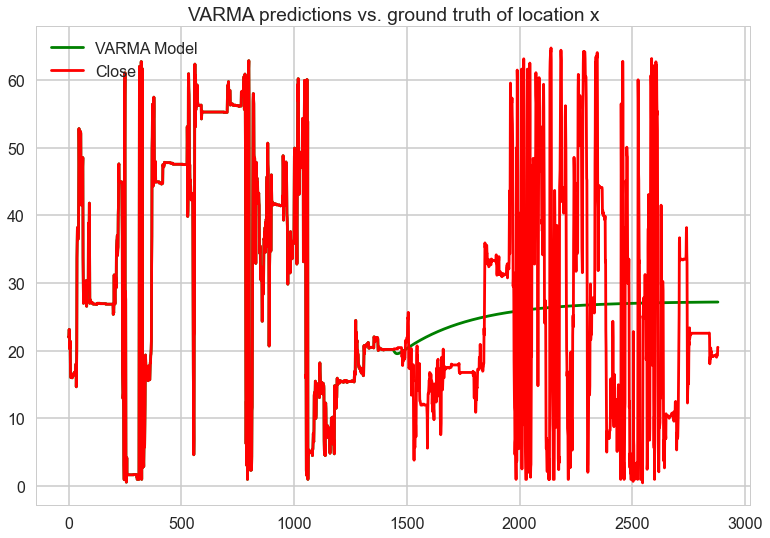

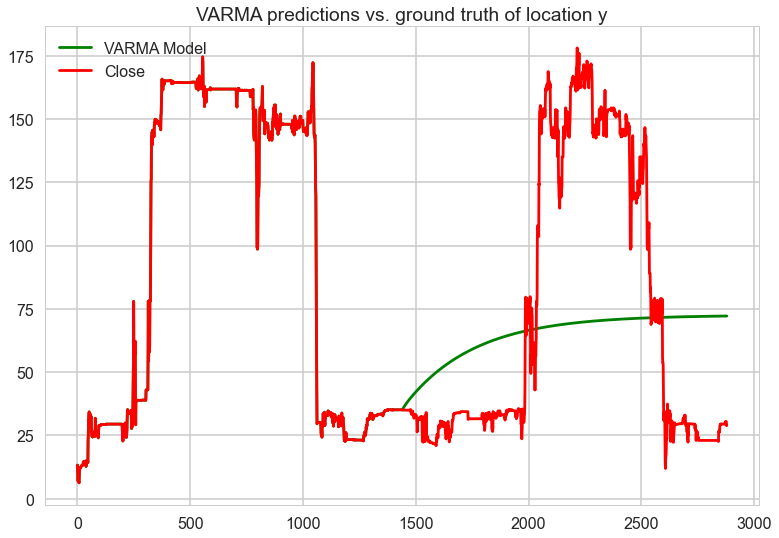

0       22.010000
1       22.010000
2       23.070000
3       23.150000
4       22.540000
          ...    
1435    27.187289
1436    27.187547
1437    27.187805
1438    27.188062
1439    27.188318
Name: location_x, Length: 2880, dtype: float64


In [21]:
#plot_time_series(ts_1 = prediction_chamber, ts_label_1 = 'VARMA Model', ts_2 = valid['chamber'], ts_label_2 = 'Close', title = 'VARMA predictions vs. ground truth')
plot_time_series(ts_1 = prediction['location_x'], ts_label_1 = 'VARMA Model', ts_2 = data['location_x'], ts_label_2 = 'Close', title = 'VARMA predictions vs. ground truth of location x')
plot_time_series(ts_1 = prediction['location_y'], ts_label_1 = 'VARMA Model', ts_2 = data['location_y'], ts_label_2 = 'Close', title = 'VARMA predictions vs. ground truth of location y')
print(prediction['location_x'])

In [35]:
def num_chamber(list_x, list_y):
    list_x = list_x.values
    list_y = list_y.values
    list_c = list()
    for i in range(len(list_x)):
        x = list_x[i]
        y = list_y[i]
        print(x, y)
        if (y > 178):
            list_c.append(5)
        else:
            if ((y <= 0)&(x <= 0)):
                list_c.append(5)
            else:
                if (y <= 46):
                    list_c.append(1)
                else:
                    if (y <= 92):
                        list_c.append(2)
                    else:
                        if (y <= 138):
                            list_c.append(3)
                        else:
                            list_c.append(4)
    return list_c  

In [36]:
print(prediction['location_x'], prediction['location_y'])
prediction_c = num_chamber(prediction['location_x'], prediction['location_y'])
prediction_c = pd.DataFrame(prediction_c, columns = ['%i'%ant_num])
prediction_c.to_csv('../dataset/insect/ant/predictions/prediction_%i.csv'%ant_num, index = False)

0       22.010000
1       22.010000
2       23.070000
3       23.150000
4       22.540000
          ...    
1435    27.187289
1436    27.187547
1437    27.187805
1438    27.188062
1439    27.188318
Name: location_x, Length: 2880, dtype: float64 0       13.290000
1       10.270000
2        7.280000
3        6.930000
4        8.280000
          ...    
1435    72.162833
1436    72.163964
1437    72.165091
1438    72.166215
1439    72.167335
Name: location_y, Length: 2880, dtype: float64
22.01 13.29
22.01 10.27
23.07 7.28
23.15 6.93
22.54 8.28
20.28 6.93
20.81 6.73
21.43 6.29
17.68 9.59
16.08 11.02
16.04 11.7
16.08 12.26
16.17 12.3
16.13 12.3
16.13 12.3
16.0 12.5
16.0 12.82
16.08 12.86
16.17 13.09
16.31 13.05
16.35 13.05
16.61 13.29
16.39 13.21
16.53 13.25
16.44 13.41
16.66 13.77
16.84 14.61
16.84 14.61
16.79 14.65
16.79 14.65
16.79 14.65
16.88 14.65
17.06 14.53
18.07 14.81
14.67 14.33
16.57 14.77
20.37 14.89
33.67 14.41
36.59 12.78
38.18 14.69
36.37 15.0
36.45 15.0
36.54 14.97
36.54 14.9

35.43 144.53
35.14 142.85
30.55 141.61
31.52 143.95
32.45 144.24
30.4 144.0
30.69 144.04
30.94 144.08
30.94 144.2
24.35 144.9
24.35 143.5
30.89 142.31
31.04 143.91
30.5 141.57
28.35 143.71
28.55 143.67
33.57 148.72
36.55 147.4
36.4 149.83
36.6 150.81
37.43 152.0
35.77 154.3
38.21 154.18
36.31 153.65
34.55 155.49
38.99 153.98
35.82 154.84
39.43 152.7
39.04 153.36
39.33 155.49
44.65 146.79
45.72 150.36
35.38 150.94
47.29 148.43
50.65 149.58
47.48 151.59
46.75 145.68
39.23 148.23
39.43 150.03
32.11 146.83
20.69 143.91
27.52 144.53
32.16 144.82
34.5 145.52
34.7 145.68
34.7 145.68
34.7 145.72
34.7 145.72
34.74 145.72
34.79 147.49
45.97 147.82
44.11 151.96
41.58 148.8
42.02 147.73
41.43 147.61
41.53 147.61
41.63 147.77
41.63 147.77
41.63 147.77
41.63 147.94
41.63 147.94
41.63 147.94
41.63 147.94
41.72 148.06
41.63 147.9
41.63 147.9
41.63 147.9
41.63 147.9
41.63 147.9
41.67 147.94
41.67 147.94
41.58 147.9
41.58 147.9
41.58 147.9
41.53 147.9
41.53 147.9
41.53 147.9
41.53 147.9
41.53 147.9
41.5

22.242747517832356 50.53180099016274
22.259035406453183 50.60305618633942
22.27527049400163 50.67408038365968
22.291452951493312 50.744874331070605
22.307582949404306 50.81543877508319
22.323660657671493 50.885774459781004
22.339686245693038 50.955882126828776
22.355659882328972 51.025762515480835
22.37158173590191 51.09541636258952
22.38745197419783 51.16484440261346
22.403270764466956 51.234047367625855
22.419038273424725 51.30302598732258
22.43475466725283 51.371780989030256
22.450420111600284 51.440313097714366
22.466034771584614 51.50862303598713
22.481598811793017 51.57671152411546
22.497112396283644 51.64457928002884
22.512575688586868 51.7122270193271
22.527988851706624 51.779655455288186
22.543352048121758 51.84686529887589
22.558665439787404 51.913857258747534
22.573929188136407 51.980632041261586
22.589143454080755 52.04719035048524
22.60430839801302 52.11353288820199
22.619424179807858 52.17966035391917
22.63449095882347 52.24557344487543
22.6495088939031 52.31127285604814


26.827055223942605 70.58690813317416
26.828481537579528 70.59314786953105
26.829903227335727 70.5993673776605
26.83132030820109 70.60556672313918
26.832732795116893 70.61174597133117
26.834140702975997 70.6179051873887
26.83554404662297 70.6240444362527
26.836942840854245 70.63016378265364
26.83833710041831 70.63626329111213
26.83972684001584 70.64234302593957
26.841112074299815 70.64840305123893
26.842492817875772 70.65444343090537
26.84386908530186 70.66046422862688
26.845240891089034 70.66646550788498
26.846608249701212 70.67244733195541
26.847971175555426 70.67840976390879
26.84932968302198 70.68435286661126
26.85068378642457 70.69027670272516
26.852033500040466 70.69618133470966
26.853378838100657 70.70206682482151
26.854719814790002 70.70793323511562
26.856056444247358 70.71378062744566
26.85738874056575 70.71960906346483
26.858716717792536 70.72541860462648
26.86004038992952 70.7312093121847
26.861359770933106 70.73698124719505
26.862674874714475 70.7427344705151
26.863985715139